In [ ]:
import pandas as pd
import numpy as np
print("Now pandas and numpy library are added in the environment")

Now pandas and numpy library are added in the environment


In [ ]:
taxi_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final Project_Numerical Methods/NYC_taxi_dataset.csv')
print(taxi_df.head())


  tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  PULocationID  \
0  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0           161   
1  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0            43   
2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0            48   
3  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0           138   
4  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0           107   

   DOLocationID  congestion_surcharge  
0           141                   2.5  
1           237                   2.5  
2           238                   2.5  
3             7                   0.0  
4            79                   2.5  


In [ ]:
weather_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final Project_Numerical Methods/Weather_data_classified1.csv')
print(weather_df.head())

                  time  Hour  Day  Month  Dayofweek  Isweekend  temp  coco  \
0  2023-01-01 00:00:00     0    1      1          6          1   9.9   5.0   
1  2023-01-01 01:00:00     1    1      1          6          1  10.0   9.0   
2  2023-01-01 02:00:00     2    1      1          6          1  10.5   8.0   
3  2023-01-01 03:00:00     3    1      1          6          1  10.6   5.0   
4  2023-01-01 04:00:00     4    1      1          6          1  10.3   5.0   

   dwpt   rhum  prcp  snow   wdir  wspd    pres  tsun Weather Classification  
0   9.9  100.0   1.0   0.0  220.0   7.6  1011.0   0.0                  Foggy  
1  10.0  100.0   0.5   0.0  220.0   5.4  1010.0   0.0                  Foggy  
2  10.5  100.0   1.0   0.0  210.0   7.6  1009.0   0.0                  Foggy  
3  10.4   99.0   2.2   0.0  190.0   9.4  1009.0   0.0                  Foggy  
4  10.1   99.0   0.7   0.0  260.0  11.2  1008.0   0.0                  Foggy  


In [ ]:
taxi_df['tpep_pickup_datetime'] = pd.to_datetime(taxi_df['tpep_pickup_datetime'])
taxi_df['tpep_dropoff_datetime'] = pd.to_datetime(taxi_df['tpep_dropoff_datetime'])
weather_df['date'] = pd.to_datetime(weather_df['time'])
taxi_df['pickup_hour'] = taxi_df['tpep_pickup_datetime'].dt.round('h')
weather_df['weather_hour'] = weather_df['date'].dt.round('h')


In [ ]:
merged_df = pd.merge(taxi_df, weather_df[['weather_hour', 'Weather Classification']],
                     left_on='pickup_hour', right_on='weather_hour', how='left')
merged_df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,PULocationID,DOLocationID,congestion_surcharge,pickup_rounded,pickup_hour,weather_hour,Weather Classification
0,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,161,141,2.5,2023-01-01,2023-01-01 01:00:00,2023-01-01 01:00:00,Foggy
1,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,43,237,2.5,2023-01-01,2023-01-01 01:00:00,2023-01-01 01:00:00,Foggy
2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,48,238,2.5,2023-01-01,2023-01-01 00:00:00,2023-01-01 00:00:00,Foggy
3,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,138,7,0.0,2023-01-01,2023-01-01 00:00:00,2023-01-01 00:00:00,Foggy
4,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,107,79,2.5,2023-01-01,2023-01-01 00:00:00,2023-01-01 00:00:00,Foggy


In [ ]:
merged_df.drop(columns=['weather_hour','pickup_hour'], inplace=True)
merged_df.to_csv('Processed_dataset.csv', index=False)



KeyError: "['weather_hour', 'pickup_hour'] not found in axis"

In [ ]:
missing_values = merged_df.isnull().sum()
print(missing_values[missing_values > 0])

missing_percent = merged_df.isnull().mean() * 100

print(missing_percent)

passenger_count           71743
congestion_surcharge      71743
Weather Classification       20
dtype: int64
tpep_pickup_datetime      0.000000
tpep_dropoff_datetime     0.000000
passenger_count           2.069689
PULocationID              0.000000
DOLocationID              0.000000
congestion_surcharge      2.069689
pickup_rounded            0.000000
Weather Classification    0.000577
dtype: float64


In [ ]:
merged_df.to_csv('Processed_dataset.csv', index=False)

In [ ]:
mode_passenger_count = merged_df['passenger_count'].mode()[0]  # Mode returns a series, we take the first element
merged_df['passenger_count'].fillna(mode_passenger_count)
merged_df['congestion_surcharge'].fillna(0)
mode_weather = merged_df['Weather Classification'].mode()[0]
merged_df['Weather Classification'].fillna(mode_weather)

,Weather Classification
0,Foggy
1,Foggy
2,Foggy
3,Foggy
4,Foggy
...,...
3466362,Other
3466363,Other
3466364,Other
3466365,Other


In [ ]:
save_path = '/content/drive/MyDrive/Colab Notebooks/Final Project_Numerical Methods/Processed_dataset.csv'
merged_df.to_csv(save_path, index=False)

In [ ]:
# prompt: How do I download my processed data set from my drive which is already mounted, into my colab environmnet

from google.colab import files
files.download('/content/drive/MyDrive/Colab Notebooks/Final Project_Numerical Methods/Processed_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final Project_Numerical Methods/Processed_dataset.csv')


<ipython-input-3-f91d5469c5bf>:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['pickup_hour'] = df['tpep_pickup_datetime'].dt.round('H')


In [ ]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.round('h')


In [ ]:
df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek
df['month'] = df['tpep_pickup_datetime'].dt.month
df['time'] = df['tpep_pickup_datetime'].dt.hour
df['weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

In [ ]:
!pip install holidays
import holidays
us_holidays = holidays.US(years=[2023])

In [ ]:
df['is_holiday'] = df['tpep_pickup_datetime'].apply(lambda x: 1 if x in us_holidays else 0)

In [ ]:
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,PULocationID,DOLocationID,congestion_surcharge,pickup_rounded,Weather Classification,pickup_hour,day_of_week,month,time,weekend,is_holiday
0,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,161,141,2.5,2023-01-01 00:00:00,Foggy,2023-01-01 01:00:00,6,1,0,1,1
1,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,43,237,2.5,2023-01-01 00:00:00,Foggy,2023-01-01 01:00:00,6,1,0,1,1
2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,48,238,2.5,2023-01-01 00:00:00,Foggy,2023-01-01 00:00:00,6,1,0,1,1
3,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,138,7,0.0,2023-01-01 00:00:00,Foggy,2023-01-01 00:00:00,6,1,0,1,1
4,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,107,79,2.5,2023-01-01 00:00:00,Foggy,2023-01-01 00:00:00,6,1,0,1,1


In [ ]:
df['year'] = df['tpep_pickup_datetime'].dt.year
new_column_order = ['day_of_week', 'month', 'year', 'time', 'weekend', 'is_holiday']
remaining_columns = [col for col in df.columns if col not in new_column_order]
df = df[new_column_order + remaining_columns]


In [ ]:
traffic_volume = df.groupby(['PULocationID', 'pickup_rounded', 'day_of_week', 'weekend', 'is_holiday', 'Weather Classification']).size().reset_index(name='traffic_volume')
df = df.merge(traffic_volume, on=['PULocationID', 'pickup_rounded', 'day_of_week', 'weekend', 'is_holiday', 'Weather Classification'], how='left')
save_path = '/content/drive/MyDrive/Colab Notebooks/Final Project_Numerical Methods/final_processed_dataset.csv'
df.to_csv(save_path, index=False)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final Project_Numerical Methods/final_processed_dataset.csv')

In [ ]:
traffic_volume = df.groupby(['PULocationID', 'pickup_rounded', 'day_of_week', 'weekend', 'is_holiday', 'Weather Classification']).size().reset_index(name='traffic_volume')


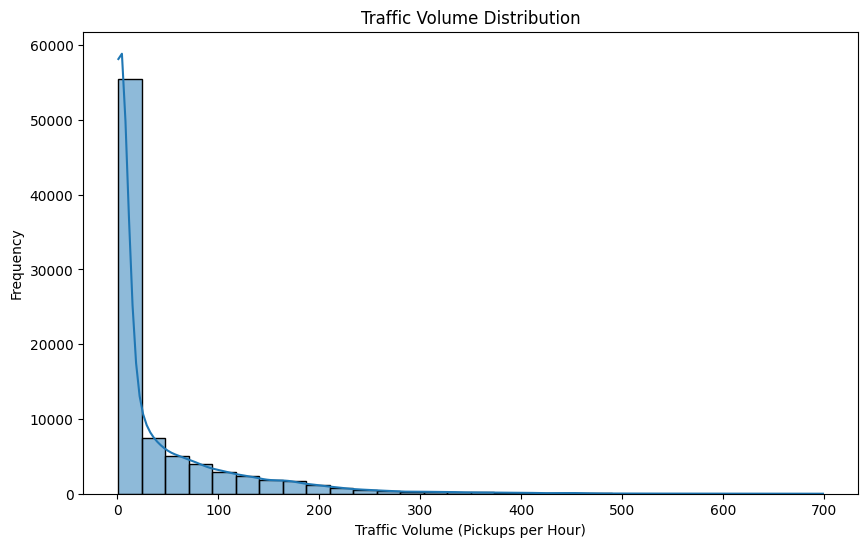

In [ ]:
# Plotting a histogram of traffic volume
plt.figure(figsize=(10, 6))
sns.histplot(traffic_volume['traffic_volume'], bins=30, kde=True)
plt.title('Traffic Volume Distribution')
plt.xlabel('Traffic Volume (Pickups per Hour)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df['log_traffic'] = np.log1p(df['traffic_volume_x'])


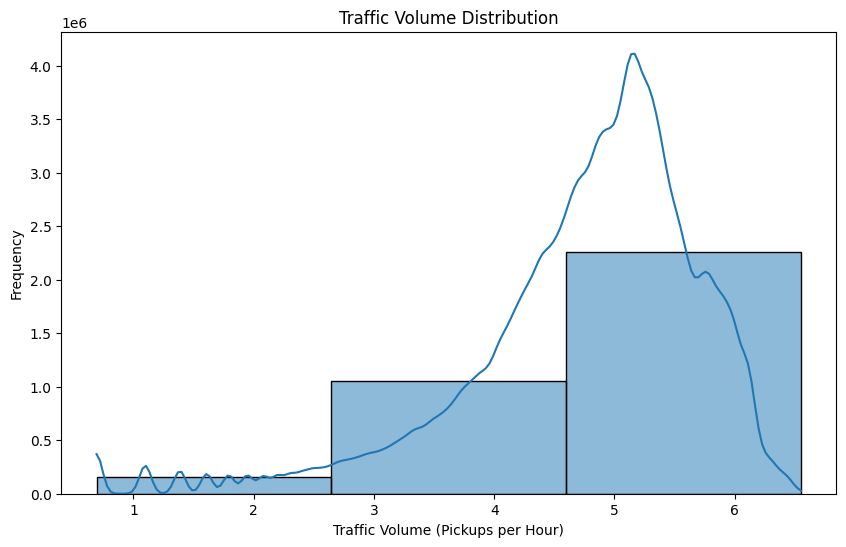

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['log_traffic'], bins=3, kde=True)
plt.title('Traffic Volume Distribution')
plt.xlabel('Traffic Volume (Pickups per Hour)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
bins = [0, 2, 4, np.inf]
labels = ['Light', 'Medium', 'Heavy']
df['traffic_status'] = pd.cut(df['log_traffic'], bins=bins, labels=labels, right=False)


,day_of_week,month,year,time,weekend,is_holiday,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,PULocationID,DOLocationID,congestion_surcharge,pickup_rounded,Weather Classification,pickup_hour,traffic_volume_x,traffic_volume_y,log_traffic,traffic_status
0,6,1,2023,0,1,1,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,161,141,2.5,2023-01-01 00:00:00,Foggy,2023-01-01 01:00:00,195.0,195.0,5.278115,Heavy
1,6,1,2023,0,1,1,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,43,237,2.5,2023-01-01 00:00:00,Foggy,2023-01-01 01:00:00,93.0,93.0,4.543295,Heavy
2,6,1,2023,0,1,1,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,48,238,2.5,2023-01-01 00:00:00,Foggy,2023-01-01 00:00:00,125.0,125.0,4.836282,Heavy
3,6,1,2023,0,1,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,138,7,0.0,2023-01-01 00:00:00,Foggy,2023-01-01 00:00:00,16.0,16.0,2.833213,Medium
4,6,1,2023,0,1,1,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,107,79,2.5,2023-01-01 00:00:00,Foggy,2023-01-01 00:00:00,176.0,176.0,5.176150,Heavy


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Encode categorical features
le_weather = LabelEncoder()
df['weather_encoded'] = le_weather.fit_transform(df['Weather Classification'])
# For 'weekend' and 'is_holiday', you can convert them into binary (0, 1)
df['weekend'] = df['weekend'].astype(int)
df['is_holiday'] = df['is_holiday'].astype(int)

In [ ]:
save_path = '/content/drive/MyDrive/Colab Notebooks/Final Project_Numerical Methods/final_processed_dataset.csv'
df.to_csv(save_path, index=False)

In [ ]:
#Calling dataset to the environnment
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final Project_Numerical Methods/final_processed_dataset.csv')
df.head()


,day_of_week,month,year,time,weekend,is_holiday,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,PULocationID,DOLocationID,congestion_surcharge,pickup_rounded,Weather Classification,pickup_hour,traffic_volume_x,traffic_volume_y,log_traffic,traffic_status,weather_encoded
0,6,1,2023,0,1,1,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,161,141,2.5,2023-01-01 00:00:00,Foggy,2023-01-01 01:00:00,195.0,195.0,5.278115,Heavy,1
1,6,1,2023,0,1,1,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,43,237,2.5,2023-01-01 00:00:00,Foggy,2023-01-01 01:00:00,93.0,93.0,4.543295,Heavy,1
2,6,1,2023,0,1,1,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,48,238,2.5,2023-01-01 00:00:00,Foggy,2023-01-01 00:00:00,125.0,125.0,4.836282,Heavy,1
3,6,1,2023,0,1,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,138,7,0.0,2023-01-01 00:00:00,Foggy,2023-01-01 00:00:00,16.0,16.0,2.833213,Medium,1
4,6,1,2023,0,1,1,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,107,79,2.5,2023-01-01 00:00:00,Foggy,2023-01-01 00:00:00,176.0,176.0,5.176150,Heavy,1


In [ ]:
# Finding null values in the dataset
df.isnull().sum()


,0
day_of_week,0
month,0
year,0
time,0
weekend,0
is_holiday,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
PULocationID,0


In [ ]:
df.dropna(inplace = True)
df.isnull().sum()


,0
day_of_week,0
month,0
year,0
time,0
weekend,0
is_holiday,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
PULocationID,0


In [ ]:
# Inspecting for uniqye values to know about redundant parameters
df.nunique()


,0
day_of_week,7
month,3
year,2
time,24
weekend,2
is_holiday,2
tpep_pickup_datetime,1814370
tpep_dropoff_datetime,1814805
passenger_count,10
PULocationID,257


In [ ]:
# Importing all necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


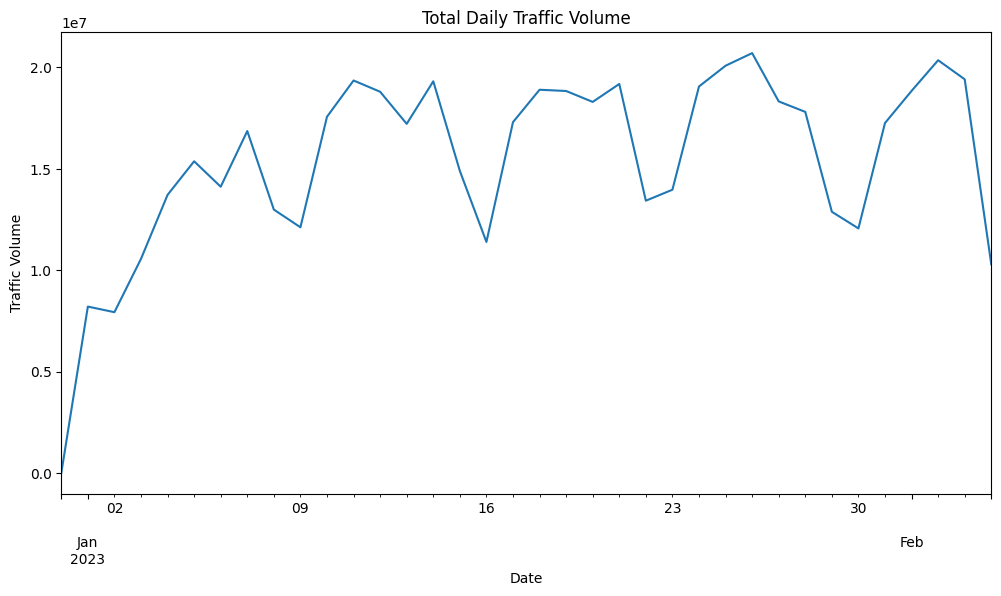

In [ ]:
#Time series Visualization (Traffic Volume Over Time)
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df.set_index('tpep_pickup_datetime').resample('D')['traffic_volume_x'].sum().plot(figsize=(12,6))

plt.title('Total Daily Traffic Volume')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.show()


<ipython-input-9-02650ef84e5f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_of_week', y='traffic_volume_x', data=day_of_week_traffic, palette='Blues_d')


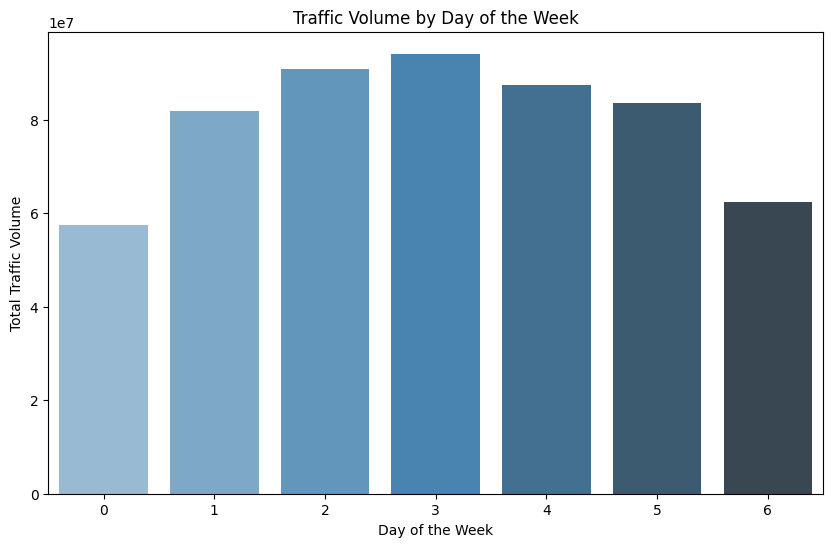

In [ ]:
# Traffic Volume by Day of the Week
day_of_week_traffic = df.groupby('day_of_week')['traffic_volume_x'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='traffic_volume_x', data=day_of_week_traffic, palette='Blues_d')

plt.title('Traffic Volume by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Traffic Volume')
plt.show()

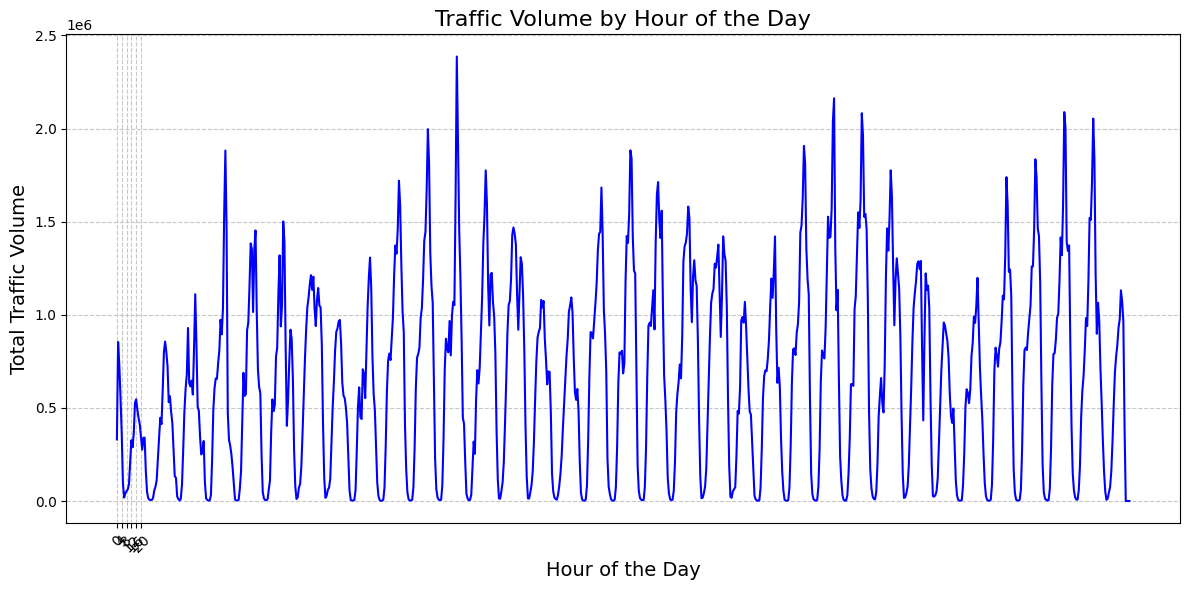

In [ ]:
hourly_traffic = df.groupby('pickup_hour')['traffic_volume_x'].sum().reset_index()

plt.figure(figsize=(12, 6))

sns.lineplot(x='pickup_hour', y='traffic_volume_x', data=hourly_traffic, color='blue')

plt.xticks(ticks=range(0, 24, 4), labels=range(0, 24, 4), rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Traffic Volume by Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Total Traffic Volume', fontsize=14)

plt.tight_layout()
plt.show()

<ipython-input-19-09f0e12f02f9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weekend', y='traffic_volume_x', data=df, palette='coolwarm')


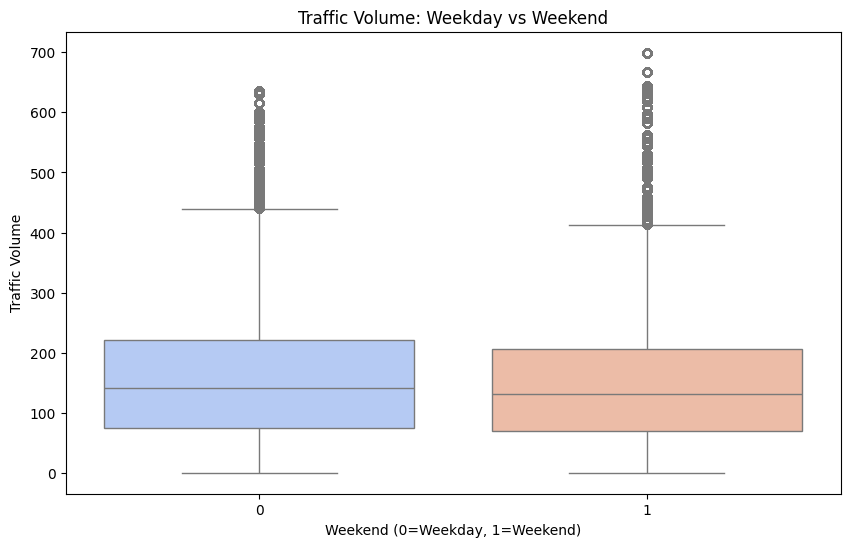

In [ ]:
# Boxplot of Traffic Volume by Day Type (Weekday vs. Weekend)
plt.figure(figsize=(10, 6))
sns.boxplot(x='weekend', y='traffic_volume_x', data=df, palette='coolwarm')

plt.title('Traffic Volume: Weekday vs Weekend')
plt.xlabel('Weekend (0=Weekday, 1=Weekend)')
plt.ylabel('Traffic Volume')
plt.show()


<ipython-input-21-e3068637d535>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weather Classification', y='log_traffic', data=weather_traffic, palette='Blues_d')


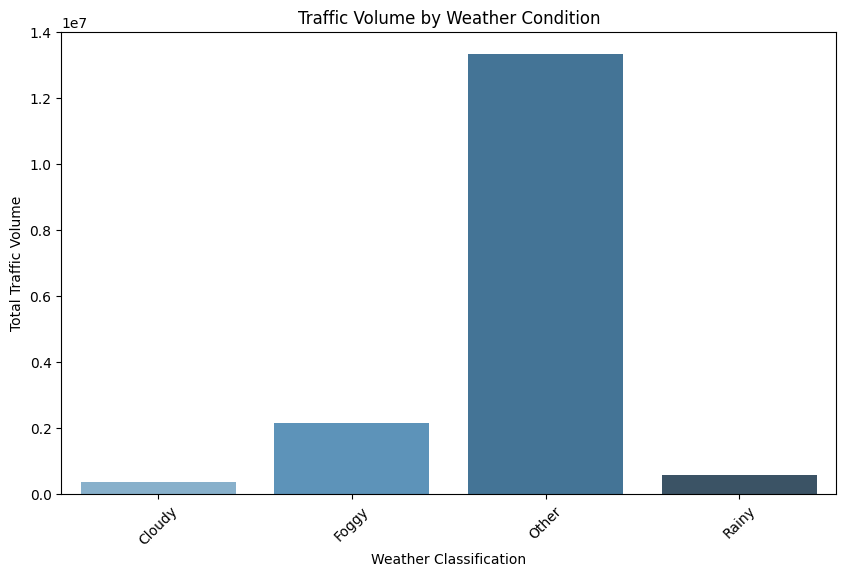

In [ ]:
weather_traffic = df.groupby('Weather Classification')['log_traffic'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Weather Classification', y='log_traffic', data=weather_traffic, palette='Blues_d')

plt.title('Traffic Volume by Weather Condition')
plt.xlabel('Weather Classification')
plt.ylabel('Total Traffic Volume')
plt.xticks(rotation=45)
plt.show()

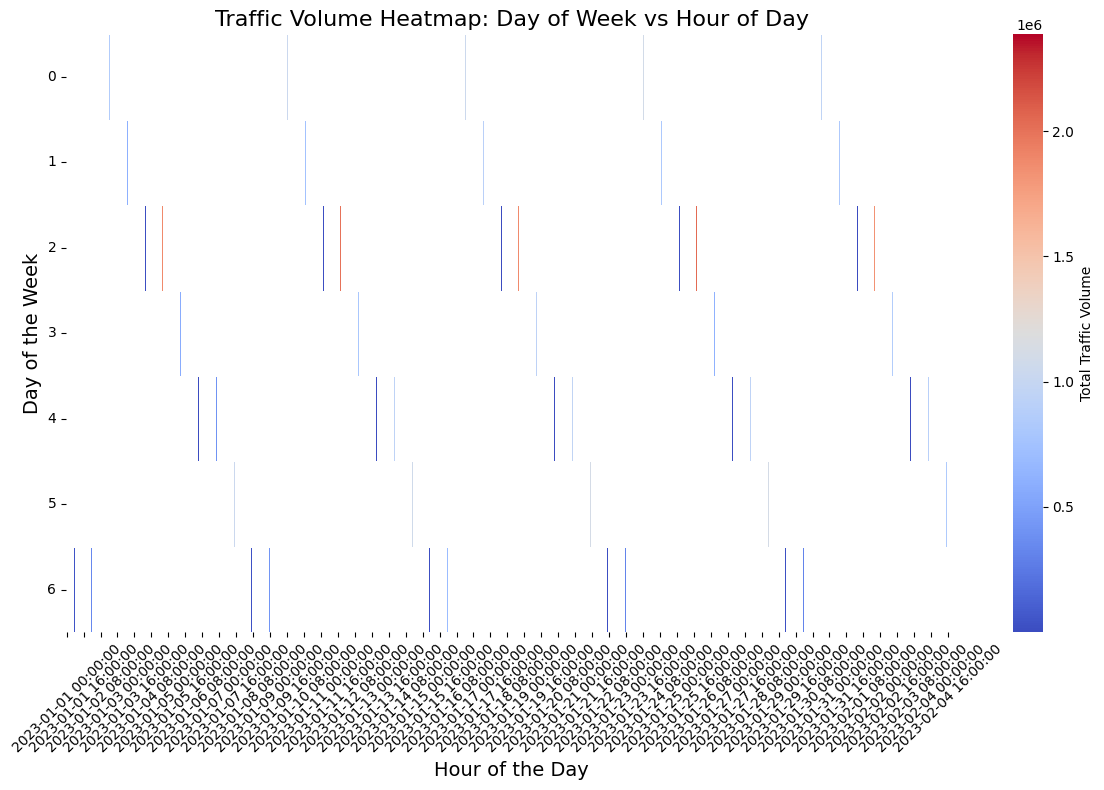

In [ ]:
#Pivot data for heatmap
pivot_table = df.pivot_table(values='traffic_volume_x', index='day_of_week', columns='pickup_hour', aggfunc='sum')
plt.figure(figsize=(12, 8))

sns.heatmap(pivot_table, cmap="coolwarm", annot=False, fmt=".1f", cbar_kws={'label': 'Total Traffic Volume'}, linewidths=.5)

plt.title('Traffic Volume Heatmap: Day of Week vs Hour of Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Day of the Week', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

In [ ]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Correlation Heatmap of Traffic Dataset Features')
plt.show()

ValueError: could not convert string to float: '2023-01-01 00:40:36'

<Figure size 1200x800 with 0 Axes>

<ipython-input-27-c49fa49171f8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='traffic_status', data=df, palette='coolwarm')


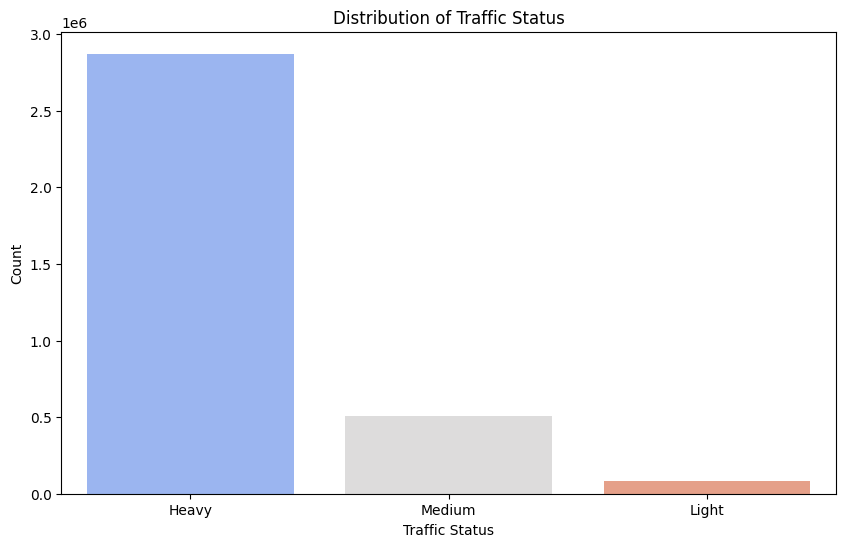

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='traffic_status', data=df, palette='coolwarm')

plt.title('Distribution of Traffic Status')
plt.xlabel('Traffic Status')
plt.ylabel('Count')
plt.show()

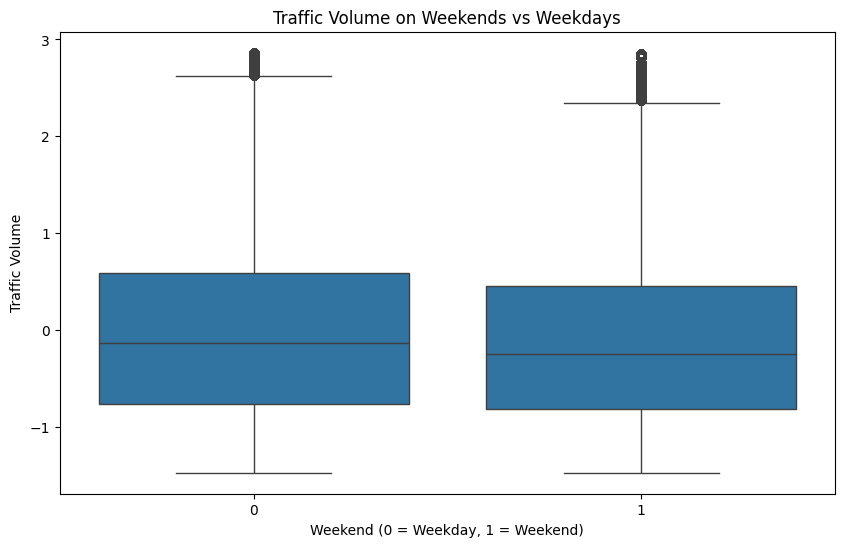

In [ ]:
# Boxplot for traffic volume vs weekend
plt.figure(figsize=(10, 6))
sns.boxplot(x='weekend', y='traffic_volume_x', data=df)
plt.title('Traffic Volume on Weekends vs Weekdays')
plt.xlabel('Weekend (0 = Weekday, 1 = Weekend)')
plt.ylabel('Traffic Volume')
plt.show()

In [ ]:
df.head(10)

,day_of_week,month,year,time,weekend,is_holiday,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,PULocationID,DOLocationID,congestion_surcharge,pickup_rounded,Weather Classification,pickup_hour,traffic_volume_x,traffic_volume_y,log_traffic,traffic_status,weather_encoded
0,6,1,2023,0,1,1,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,161,141,2.5,2023-01-01 00:00:00,Foggy,0,195.0,195.0,5.278115,Heavy,1
1,6,1,2023,0,1,1,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,43,237,2.5,2023-01-01 00:00:00,Foggy,0,93.0,93.0,4.543295,Heavy,1
2,6,1,2023,0,1,1,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,48,238,2.5,2023-01-01 00:00:00,Foggy,0,125.0,125.0,4.836282,Heavy,1
3,6,1,2023,0,1,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,138,7,0.0,2023-01-01 00:00:00,Foggy,0,16.0,16.0,2.833213,Medium,1
4,6,1,2023,0,1,1,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,107,79,2.5,2023-01-01 00:00:00,Foggy,0,176.0,176.0,5.176150,Heavy,1
5,6,1,2023,0,1,1,2023-01-01 00:50:34,2023-01-01 01:02:52,1.0,161,137,2.5,2023-01-01 00:00:00,Foggy,0,195.0,195.0,5.278115,Heavy,1
6,6,1,2023,0,1,1,2023-01-01 00:09:22,2023-01-01 00:19:49,1.0,239,143,2.5,2023-01-01 00:00:00,Foggy,0,166.0,166.0,5.117994,Heavy,1
7,6,1,2023,0,1,1,2023-01-01 00:27:12,2023-01-01 00:49:56,1.0,142,200,2.5,2023-01-01 00:00:00,Foggy,0,199.0,199.0,5.298317,Heavy,1
8,6,1,2023,0,1,1,2023-01-01 00:21:44,2023-01-01 00:36:40,1.0,164,236,2.5,2023-01-01 00:00:00,Foggy,0,122.0,122.0,4.812184,Heavy,1
9,6,1,2023,0,1,1,2023-01-01 00:39:42,2023-01-01 00:50:36,1.0,141,107,2.5,2023-01-01 00:00:00,Foggy,0,190.0,190.0,5.252273,Heavy,1


In [ ]:
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60.0

TypeError: cannot subtract DatetimeArray from ndarray

In [ ]:
df = pd.get_dummies(df, columns=['Weather Classification'], drop_first=True)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['traffic_status_encoded'] = le.fit_transform(df['traffic_status'])

df[['Weather Classification_Foggy', 'Weather Classification_Cloudy', 'traffic_status_encoded']].head()


KeyError: "['Weather Classification_Cloudy'] not in index"

In [ ]:
# Label encoding for PULocationID and DOLocationID
df['PULocationID_encoded'] = le.fit_transform(df['PULocationID'])
df['DOLocationID_encoded'] = le.fit_transform(df['DOLocationID'])
df[['PULocationID_encoded', 'DOLocationID_encoded']].head()

,PULocationID_encoded,DOLocationID_encoded
0,153,137
1,41,232
2,46,233
3,130,6
4,100,78


In [ ]:
from sklearn.preprocessing import StandardScaler

Q1 = df[['traffic_volume_x', 'traffic_volume_y', 'congestion_surcharge', 'log_traffic']].quantile(0.25)
Q3 = df[['traffic_volume_x', 'traffic_volume_y', 'congestion_surcharge', 'log_traffic']].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[['traffic_volume_x', 'traffic_volume_y', 'congestion_surcharge', 'log_traffic']] < (Q1 - 1.5 * IQR)) | (df[['traffic_volume_x', 'traffic_volume_y', 'congestion_surcharge', 'log_traffic']] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Scaling numeric columns
scaler = StandardScaler()
df[['traffic_volume_x', 'traffic_volume_y', 'congestion_surcharge', 'log_traffic']] = scaler.fit_transform(df[['traffic_volume_x', 'traffic_volume_y', 'congestion_surcharge', 'log_traffic']])

# Check the result
df[['traffic_volume_x', 'traffic_volume_y', 'congestion_surcharge', 'log_traffic']].head()


<ipython-input-51-11f1f474392c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['traffic_volume_x', 'traffic_volume_y', 'congestion_surcharge', 'log_traffic']] = scaler.fit_transform(df[['traffic_volume_x', 'traffic_volume_y', 'congestion_surcharge', 'log_traffic']])


,traffic_volume_x,traffic_volume_y,congestion_surcharge,log_traffic
0,0.401688,0.401688,0.0,0.613789
1,-0.661860,-0.661860,0.0,-0.425212
2,-0.328198,-0.328198,0.0,-0.010942
4,0.203576,0.203576,0.0,0.469615
5,0.401688,0.401688,0.0,0.613789


In [ ]:
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919044 entries, 0 to 3466266
Data columns (total 25 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   day_of_week                   int64  
 1   month                         int64  
 2   year                          int64  
 3   time                          int64  
 4   weekend                       int64  
 5   is_holiday                    int64  
 6   tpep_pickup_datetime          object 
 7   tpep_dropoff_datetime         object 
 8   passenger_count               float64
 9   PULocationID                  int64  
 10  DOLocationID                  int64  
 11  congestion_surcharge          float64
 12  pickup_rounded                object 
 13  pickup_hour                   object 
 14  traffic_volume_x              float64
 15  traffic_volume_y              float64
 16  log_traffic                   float64
 17  traffic_status                object 
 18  weather_encoded            

In [ ]:
df = df.drop(columns=[
    'tpep_pickup_datetime',
    'tpep_dropoff_datetime',
    'weather_encoded',
    'traffic_status',
    'PULocationID',
    'DOLocationID',
    'time',
    'pickup_rounded',
    'weekend',
    'is_holiday'
])

In [ ]:
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919044 entries, 0 to 3466266
Data columns (total 15 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   day_of_week                   int64  
 1   month                         int64  
 2   year                          int64  
 3   passenger_count               float64
 4   congestion_surcharge          float64
 5   pickup_hour                   object 
 6   traffic_volume_x              float64
 7   traffic_volume_y              float64
 8   log_traffic                   float64
 9   Weather Classification_Foggy  bool   
 10  Weather Classification_Other  bool   
 11  Weather Classification_Rainy  bool   
 12  traffic_status_encoded        int64  
 13  PULocationID_encoded          int64  
 14  DOLocationID_encoded          int64  
dtypes: bool(3), float64(5), int64(6), object(1)
memory usage: 297.9+ MB


In [ ]:
# prompt: save data set todrive folder as modelling dataset

save_path = '/content/drive/MyDrive/modelling_dataset.csv'
df.to_csv(save_path, index=False)

In [ ]:
df.head()

,day_of_week,month,year,passenger_count,congestion_surcharge,pickup_hour,traffic_volume_x,traffic_volume_y,log_traffic,Weather Classification_Foggy,Weather Classification_Other,Weather Classification_Rainy,traffic_status_encoded,PULocationID_encoded,DOLocationID_encoded
0,6,1,2023,1.0,0.0,2023-01-01 01:00:00,0.401688,0.401688,0.613789,True,False,False,0,153,137
1,6,1,2023,1.0,0.0,2023-01-01 01:00:00,-0.661860,-0.661860,-0.425212,True,False,False,0,41,232
2,6,1,2023,1.0,0.0,2023-01-01 00:00:00,-0.328198,-0.328198,-0.010942,True,False,False,0,46,233
4,6,1,2023,1.0,0.0,2023-01-01 00:00:00,0.203576,0.203576,0.469615,True,False,False,0,100,78
5,6,1,2023,1.0,0.0,2023-01-01 01:00:00,0.401688,0.401688,0.613789,True,False,False,0,153,133


In [ ]:
df['pickup_hour'] = pd.to_numeric(df['pickup_hour'], errors='coerce')
df['pickup_hour'].fillna(df['pickup_hour'].median(), inplace=True)

<ipython-input-70-c2c04b86289a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['pickup_hour'].fillna(df['pickup_hour'].median(), inplace=True)


In [ ]:
# Split data into features (X) and target (y)
X = df.drop(columns=['traffic_volume_x'])  # Drop non-features
y = df['traffic_volume_x']  # Target variable

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(2335235, 14)
(583809, 14)
(2335235,)
(583809,)


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create the XGBoost model
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Absolute Error: 0.0026190843697045485
Mean Squared Error: 2.9661212966648246e-05
R-squared: 0.9999703741103475


In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

In [ ]:
# Cross validation to check model's robustness
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error')

print(f"Cross-validated MAE scores: {-cv_scores}")
print(f"Mean MAE score: {-np.mean(cv_scores)}")


Cross-validated MAE scores: [0.00261908 0.00264705 0.00263887 0.00266268 0.00264465]
Mean MAE score: 0.0026424655745032116


In [ ]:
print(model)
if hasattr(model, "feature_importances_"):
    print("Model is fitted and ready to save.")
else:
    print("Model is not fitted yet.")

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Model is not fitted yet.


In [ ]:
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
# Train the model
model.fit(X_train, y_train)
# Check if the model is now fitted
if hasattr(model, "feature_importances_"):
    print("Model is now fitted and ready to save.")
else:
    print("Model is still not fitted.")

Model is now fitted and ready to save.


In [ ]:
from google.colab import drive
model.save_model('/content/drive/MyDrive/Colab Notebooks/Final Project_Numerical Methods/xgboost_model.json')

In [ ]:
# Load the model from the JSON file

import xgboost as xgb
model = xgb.Booster()
model.load_model('/content/drive/MyDrive/Colab Notebooks/Final Project_Numerical Methods/xgboost_model.json')

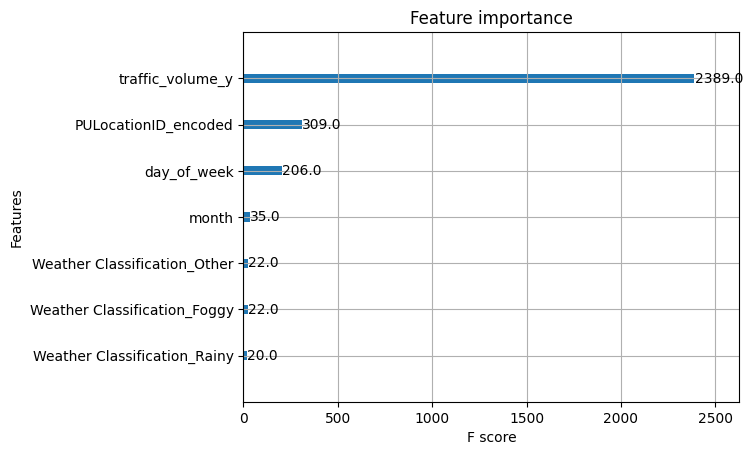

In [ ]:
#Feature Importance-features which contribute most to theprediction
import matplotlib.pyplot as plt
importance = model.get_score(importance_type='weight')
xgb.plot_importance(model, importance_type='weight', max_num_features=10)  # Top 10 features
plt.show()

In [ ]:
# Model parameters
params = model.attributes()
print(params)

{'scikit_learn': '{"_estimator_type": "regressor"}'}


<Figure size 8000x4000 with 0 Axes>

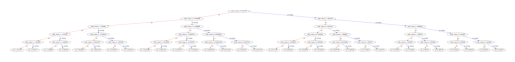

In [ ]:
# Model's decision trees to text format
plt.figure(figsize=(40, 20), dpi=200)
xgb.plot_tree(model, num_trees=0)
plt.show()

<Figure size 12000x6000 with 0 Axes>

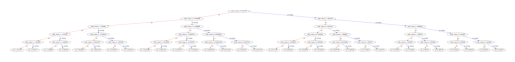

In [ ]:
# Save the tree as a high-resolution image
plt.figure(figsize=(40, 20), dpi=300)
xgb.plot_tree(model, num_trees=0)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Final Project_Numerical Methods/xgboost_tree.png')

<Figure size 12000x6000 with 0 Axes>

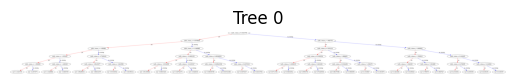

<Figure size 12000x6000 with 0 Axes>

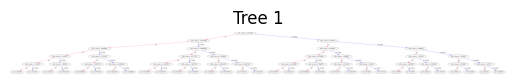

<Figure size 12000x6000 with 0 Axes>

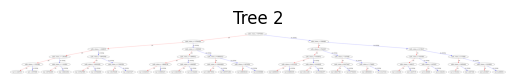

<Figure size 12000x6000 with 0 Axes>

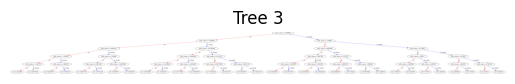

<Figure size 12000x6000 with 0 Axes>

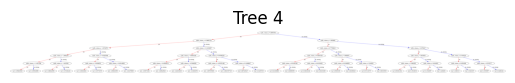

In [ ]:
for i in range(5):  # Visualizing first 5 trees
    plt.figure(figsize=(40, 20), dpi=300)
    xgb.plot_tree(model, num_trees=i)
    plt.title(f'Tree {i}')
    plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final Project_Numerical Methods/Datasets/final_processed_dataset.csv')

data.shape

(3466367, 20)

In [ ]:
print(data.isnull().sum())

day_of_week                0
month                      0
year                       0
time                       0
weekend                    0
is_holiday                 0
tpep_pickup_datetime       0
tpep_dropoff_datetime      0
passenger_count            0
PULocationID               0
DOLocationID               0
congestion_surcharge       0
pickup_rounded             0
Weather Classification    20
pickup_hour                0
traffic_volume_x          20
traffic_volume_y          20
log_traffic               20
traffic_status            20
weather_encoded            0
dtype: int64


In [ ]:
data_cleaned = data.dropna()
print(data_cleaned.isnull().sum())

day_of_week               0
month                     0
year                      0
time                      0
weekend                   0
is_holiday                0
tpep_pickup_datetime      0
tpep_dropoff_datetime     0
passenger_count           0
PULocationID              0
DOLocationID              0
congestion_surcharge      0
pickup_rounded            0
Weather Classification    0
pickup_hour               0
traffic_volume_x          0
traffic_volume_y          0
log_traffic               0
traffic_status            0
weather_encoded           0
dtype: int64


In [ ]:
import pandas as pd

# Check if all columns are numeric or categorical
print(data.dtypes)

# Check if there are any remaining NaN values
print(data.isnull().sum())

# Check if there are any duplicate rows
print(data.duplicated().sum())

# Check for categorical variables and ensure they are encoded properly
print(data.select_dtypes(include=['object']).columns)


day_of_week                 int64
month                       int64
year                        int64
time                        int64
weekend                     int64
is_holiday                  int64
tpep_pickup_datetime       object
tpep_dropoff_datetime      object
passenger_count           float64
PULocationID                int64
DOLocationID                int64
congestion_surcharge      float64
pickup_rounded             object
Weather Classification     object
pickup_hour                object
traffic_volume_x          float64
traffic_volume_y          float64
log_traffic               float64
traffic_status             object
weather_encoded             int64
dtype: object
day_of_week                0
month                      0
year                       0
time                       0
weekend                    0
is_holiday                 0
tpep_pickup_datetime       0
tpep_dropoff_datetime      0
passenger_count            0
PULocationID               0
DOLocationID    

In [ ]:

data.columns

Index(['day_of_week', 'month', 'year', 'time', 'weekend', 'is_holiday',
       'passenger_count', 'PULocationID', 'DOLocationID',
       'congestion_surcharge', 'pickup_rounded', 'Weather Classification',
       'pickup_hour', 'traffic_volume_x', 'traffic_volume_y', 'log_traffic',
       'traffic_status', 'weather_encoded'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# Encode PULocationID and DOLocationID
data['PULocationID_encoded'] = encoder.fit_transform(data['PULocationID'])
data['DOLocationID_encoded'] = encoder.fit_transform(data['DOLocationID'])

In [ ]:
data.head()


,day_of_week,month,year,time,weekend,is_holiday,passenger_count,PULocationID,DOLocationID,congestion_surcharge,pickup_rounded,Weather Classification,pickup_hour,traffic_volume_x,traffic_volume_y,log_traffic,traffic_status,weather_encoded,PULocationID_encoded,DOLocationID_encoded
0,6,1,2023,0,1,1,1.0,161,141,2.5,2023-01-01 00:00:00,Foggy,2023-01-01 01:00:00,195.0,195.0,5.278115,Heavy,1,153,137
1,6,1,2023,0,1,1,1.0,43,237,2.5,2023-01-01 00:00:00,Foggy,2023-01-01 01:00:00,93.0,93.0,4.543295,Heavy,1,41,232
2,6,1,2023,0,1,1,1.0,48,238,2.5,2023-01-01 00:00:00,Foggy,2023-01-01 00:00:00,125.0,125.0,4.836282,Heavy,1,46,233
3,6,1,2023,0,1,1,0.0,138,7,0.0,2023-01-01 00:00:00,Foggy,2023-01-01 00:00:00,16.0,16.0,2.833213,Medium,1,130,6
4,6,1,2023,0,1,1,1.0,107,79,2.5,2023-01-01 00:00:00,Foggy,2023-01-01 00:00:00,176.0,176.0,5.176150,Heavy,1,100,78


In [ ]:
data.columns

Index(['day_of_week', 'month', 'year', 'time', 'weekend', 'is_holiday',
       'passenger_count', 'PULocationID', 'DOLocationID',
       'congestion_surcharge', 'pickup_rounded', 'Weather Classification',
       'pickup_hour', 'traffic_volume_x', 'traffic_volume_y', 'log_traffic',
       'traffic_status', 'weather_encoded', 'PULocationID_encoded',
       'DOLocationID_encoded'],
      dtype='object')

In [ ]:
data['traffic_status_encoded'] = data['traffic_status'].map({'low': 0, 'Medium': 1, 'Heavy': 2})
data.head(100)

,day_of_week,month,year,time,weekend,is_holiday,passenger_count,PULocationID,DOLocationID,congestion_surcharge,...,Weather Classification,pickup_hour,traffic_volume_x,traffic_volume_y,log_traffic,traffic_status,weather_encoded,PULocationID_encoded,DOLocationID_encoded,traffic_status_encoded
0,6,1,2023,0,1,1,1.0,161,141,2.5,...,Foggy,2023-01-01 01:00:00,195.0,195.0,5.278115,Heavy,1,153,137,2.0
1,6,1,2023,0,1,1,1.0,43,237,2.5,...,Foggy,2023-01-01 01:00:00,93.0,93.0,4.543295,Heavy,1,41,232,2.0
2,6,1,2023,0,1,1,1.0,48,238,2.5,...,Foggy,2023-01-01 00:00:00,125.0,125.0,4.836282,Heavy,1,46,233,2.0
3,6,1,2023,0,1,1,0.0,138,7,0.0,...,Foggy,2023-01-01 00:00:00,16.0,16.0,2.833213,Medium,1,130,6,1.0
4,6,1,2023,0,1,1,1.0,107,79,2.5,...,Foggy,2023-01-01 00:00:00,176.0,176.0,5.176150,Heavy,1,100,78,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6,1,2023,0,1,1,1.0,75,75,0.0,...,Foggy,2023-01-01 00:00:00,18.0,18.0,2.944439,Medium,1,72,74,1.0
96,6,1,2023,0,1,1,1.0,138,95,0.0,...,Foggy,2023-01-01 00:00:00,16.0,16.0,2.833213,Medium,1,130,94,1.0
97,6,1,2023,0,1,1,1.0,132,218,0.0,...,Foggy,2023-01-01 01:00:00,258.0,258.0,5.556828,Heavy,1,124,213,2.0
98,6,1,2023,0,1,1,1.0,264,186,2.5,...,Foggy,2023-01-01 00:00:00,72.0,72.0,4.290459,Heavy,1,255,182,2.0


In [ ]:
nan_count = data['traffic_status_encoded'].isna().sum()
print(f"NaN values in 'traffic_status_encoded': {nan_count}")

NaN values in 'traffic_status_encoded': 85277


In [ ]:
most_frequent_value = data['traffic_status_encoded'].mode()[0]
data['traffic_status_encoded'].fillna(most_frequent_value, inplace=True)

<ipython-input-45-03b7557163a3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['traffic_status_encoded'].fillna(most_frequent_value, inplace=True)


In [ ]:
data.columns

Index(['day_of_week', 'month', 'year', 'time', 'weekend', 'is_holiday',
       'passenger_count', 'PULocationID', 'DOLocationID',
       'congestion_surcharge', 'pickup_rounded', 'Weather Classification',
       'pickup_hour', 'traffic_volume_x', 'traffic_volume_y', 'log_traffic',
       'traffic_status', 'weather_encoded', 'PULocationID_encoded',
       'DOLocationID_encoded', 'traffic_status_encoded'],
      dtype='object')

In [ ]:
selected_features = [
    'day_of_week', 'month', 'year', 'pickup_hour', 'traffic_volume_x', 'traffic_volume_y',
    'log_traffic', 'passenger_count', 'congestion_surcharge',
    'PULocationID_encoded', 'DOLocationID_encoded'
]
# Prepare the features and target
X = data[selected_features]
y = data['traffic_status_encoded']
print(y)

0          2.0
1          2.0
2          2.0
3          1.0
4          2.0
          ... 
3466362    2.0
3466363    2.0
3466364    2.0
3466365    2.0
3466366    1.0
Name: traffic_status_encoded, Length: 3466367, dtype: float64


In [ ]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))